Final MSE (shallow, batch=1 SGD): 0.6307152509689331
Final MSE (deep, batch=1 SGD):    0.5083373785018921


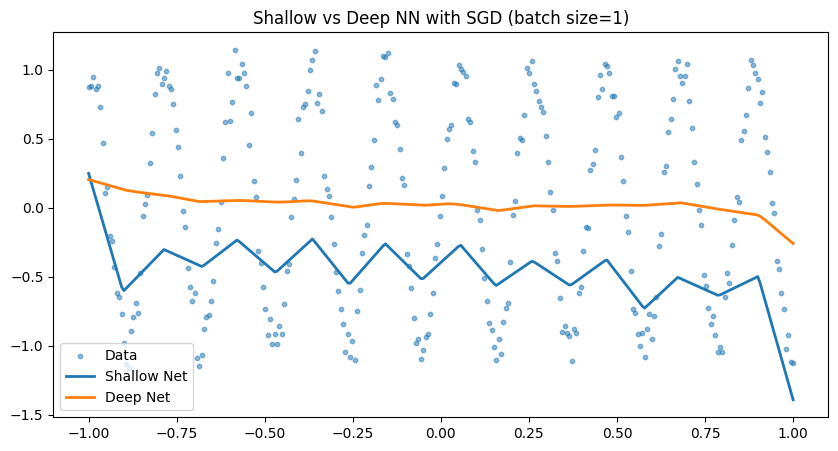

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Synthetic data
torch.manual_seed(0)
N = 300
X = torch.linspace(-1, 1, N).unsqueeze(1)
y = torch.sin(30*X)  + 0.1*torch.randn_like(X)

# --- Define shallow vs deep networks ---
class ShallowNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 1200),
            nn.ReLU(),
            nn.Linear(1200, 1)
        )
    def forward(self, x): return self.net(x)

class DeepNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 100), nn.ReLU(),
            nn.Linear(100, 100), nn.ReLU(),
            nn.Linear(100, 100), nn.ReLU(),
            nn.Linear(100, 1)
        )
    def forward(self, x): return self.net(x)

# Training with batch size = 1 (true SGD)
def train_sgd_batch1(model, X, y, epochs=20, lr=1e-3):
    opt = optim.SGD(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss()
    N = len(X)

    for epoch in range(epochs):
        # shuffle each epoch
        perm = torch.randperm(N)
        for i in perm:
            xi, yi = X[i].unsqueeze(0), y[i].unsqueeze(0)  # shape (1,1)
            opt.zero_grad()
            loss = loss_fn(model(xi), yi)
            loss.backward()
            opt.step()
    # compute final loss on full dataset
    return loss_fn(model(X), y).item()

# Train both networks with true SGD
shallow, deep = ShallowNet(), DeepNet()
loss_shallow = train_sgd_batch1(shallow, X, y, epochs=1000, lr=1e-3)
loss_deep = train_sgd_batch1(deep, X, y, epochs=1000, lr=1e-3)

print("Final MSE (shallow, batch=1 SGD):", loss_shallow)
print("Final MSE (deep, batch=1 SGD):   ", loss_deep)

# Plot results
plt.figure(figsize=(10,5))
plt.scatter(X.numpy(), y.numpy(), s=10, label="Data", alpha=0.5)
plt.plot(X.numpy(), shallow(X).detach().numpy(), label="Shallow Net", lw=2)
plt.plot(X.numpy(), deep(X).detach().numpy(), label="Deep Net", lw=2)
plt.legend(); plt.title("Shallow vs Deep NN with SGD (batch size=1)")
plt.show()
